[**NHS Report says**](https://www.nhs.uk/live-well/eat-well/healthy-breakfast-cereals/) : 
For a healthier option, choose breakfast cereals that contain wholegrains and are lower in sugar, fat and salt.

Sugar, fat and salt levels
You can use the per 100g information on the nutrition label to identify breakfast cereals that are:

**High in sugar, fat or salt**

1. high in sugar: more than 22.5g of total sugars per 100g
2. high in fat: more than 17.5g of fat per 100g
3. high in salt: more than 1.5g of salt per 100g


**Low in sugar, fat or salt**

1. low in sugar: 5g of total sugars or less per 100g
2. low in fat: 3g of saturated fat or less per 100g
3. low in salt: 0.3g of salt or less per 100g

**How many calories should breakfast provide?**

A helpful rule of thumb to maintain a healthy weight is to follow the 400-600-600 approach.

That means having about:

400kcal for breakfast (including any drinks and accompaniments)
600kcal for lunch (including any drinks and accompaniments)
600kcal for dinner (including any drinks and accompaniments)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version

import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly


import os
print(os.listdir("C:/Users/SAMSUNG/Desktop/example"))

['cereal.csv', 'chopstick-effectiveness.csv', '새 폴더']


In [5]:
cereal_df = pd.read_csv("C:/Users/SAMSUNG/Desktop/example/cereal.csv")
cereal_df.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


**Name: Name of cereal**
mfr: Manufacturer of cereal
A = American Home Food Products;
G = General Mills
K = Kelloggs
N = Nabisco
P = Post
Q = Quaker Oats
R = Ralston Purina

**type**
cold
hot


###### calories: calories per serving
##### protein: grams of protein
##### fat: grams of fat
##### sodium: milligrams of sodium
##### fiber: grams of dietary fiber
##### carbo: grams of complex carbohydrates
##### sugars: grams of sugars
##### potass: milligrams of potassium
##### vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
##### shelf: display shelf (1, 2, or 3, counting from the floor)
##### weight: weight in ounces of one serving
##### cups: number of cups in one serving
##### rating: a rating of the cereals (Possibly from Consumer Reports?)

In [6]:
cereal_df['weight'].value_counts()

1.00    64
1.33     5
0.50     2
1.50     2
1.25     2
1.30     1
0.83     1
Name: weight, dtype: int64

In [53]:
def nutritions_per_kg(cols):
    for col in cols:
        cereal_df[col] = cereal_df[col]/cereal_df['weight']
    
cols = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']
nutritions_per_kg(cols)

In [54]:
cereal_df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating', 'healthy'],
      dtype='object')

In [12]:
cereal_df.round(2)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70.00,4.00,1.00,130.00,10.00,5.00,6.00,280.00,25.00,3,1.00,0.33,68.40
1,100% Natural Bran,Q,C,120.00,3.00,5.00,15.00,2.00,8.00,8.00,135.00,0.00,3,1.00,1.00,33.98
2,All-Bran,K,C,70.00,4.00,1.00,260.00,9.00,7.00,5.00,320.00,25.00,3,1.00,0.33,59.43
3,All-Bran with Extra Fiber,K,C,50.00,4.00,0.00,140.00,14.00,8.00,0.00,330.00,25.00,3,1.00,0.50,93.70
4,Almond Delight,R,C,110.00,2.00,2.00,200.00,1.00,14.00,8.00,-1.00,25.00,3,1.00,0.75,34.38
5,Apple Cinnamon Cheerios,G,C,110.00,2.00,2.00,180.00,1.50,10.50,10.00,70.00,25.00,1,1.00,0.75,29.51
6,Apple Jacks,K,C,110.00,2.00,0.00,125.00,1.00,11.00,14.00,30.00,25.00,2,1.00,1.00,33.17
7,Basic 4,G,C,55.26,1.28,0.85,89.26,0.85,7.65,3.40,42.51,10.63,3,1.33,0.75,37.04
8,Bran Chex,R,C,90.00,2.00,1.00,200.00,4.00,15.00,6.00,125.00,25.00,1,1.00,0.67,49.12
9,Bran Flakes,P,C,90.00,3.00,0.00,210.00,5.00,13.00,5.00,190.00,25.00,3,1.00,0.67,53.31


In [13]:
cereal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
name        77 non-null object
mfr         77 non-null object
type        77 non-null object
calories    77 non-null float64
protein     77 non-null float64
fat         77 non-null float64
sodium      77 non-null float64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null float64
potass      77 non-null float64
vitamins    77 non-null float64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(12), int64(1), object(3)
memory usage: 8.8+ KB


Text(0.5,1,'Sugar level in Cereals')

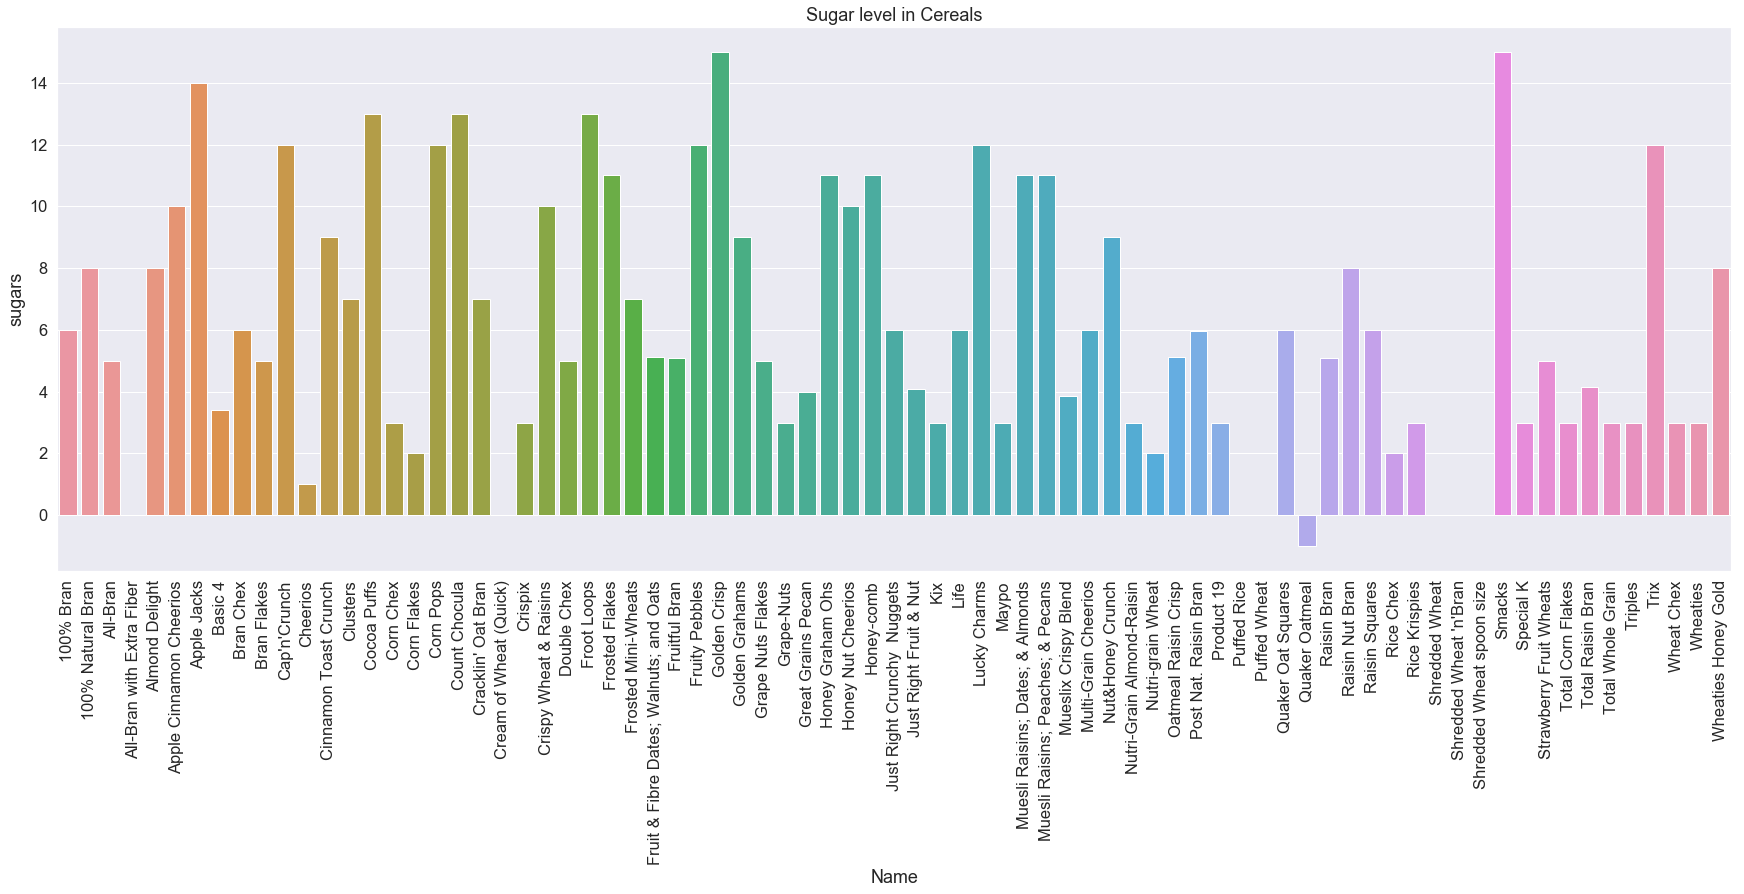

In [23]:
plt.figure(figsize = (30,10))
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)

plt.subplot()

ax = sns.barplot(x='name', y='sugars', data=cereal_df)
ax.set_xticklabels(cereal_df['name'], rotation=90, ha="center")
ax.set(xlabel='Name',ylabel='sugars')
ax.set_title('Sugar level in Cereals')

Text(0.5,1,'Salt level in Cereals')

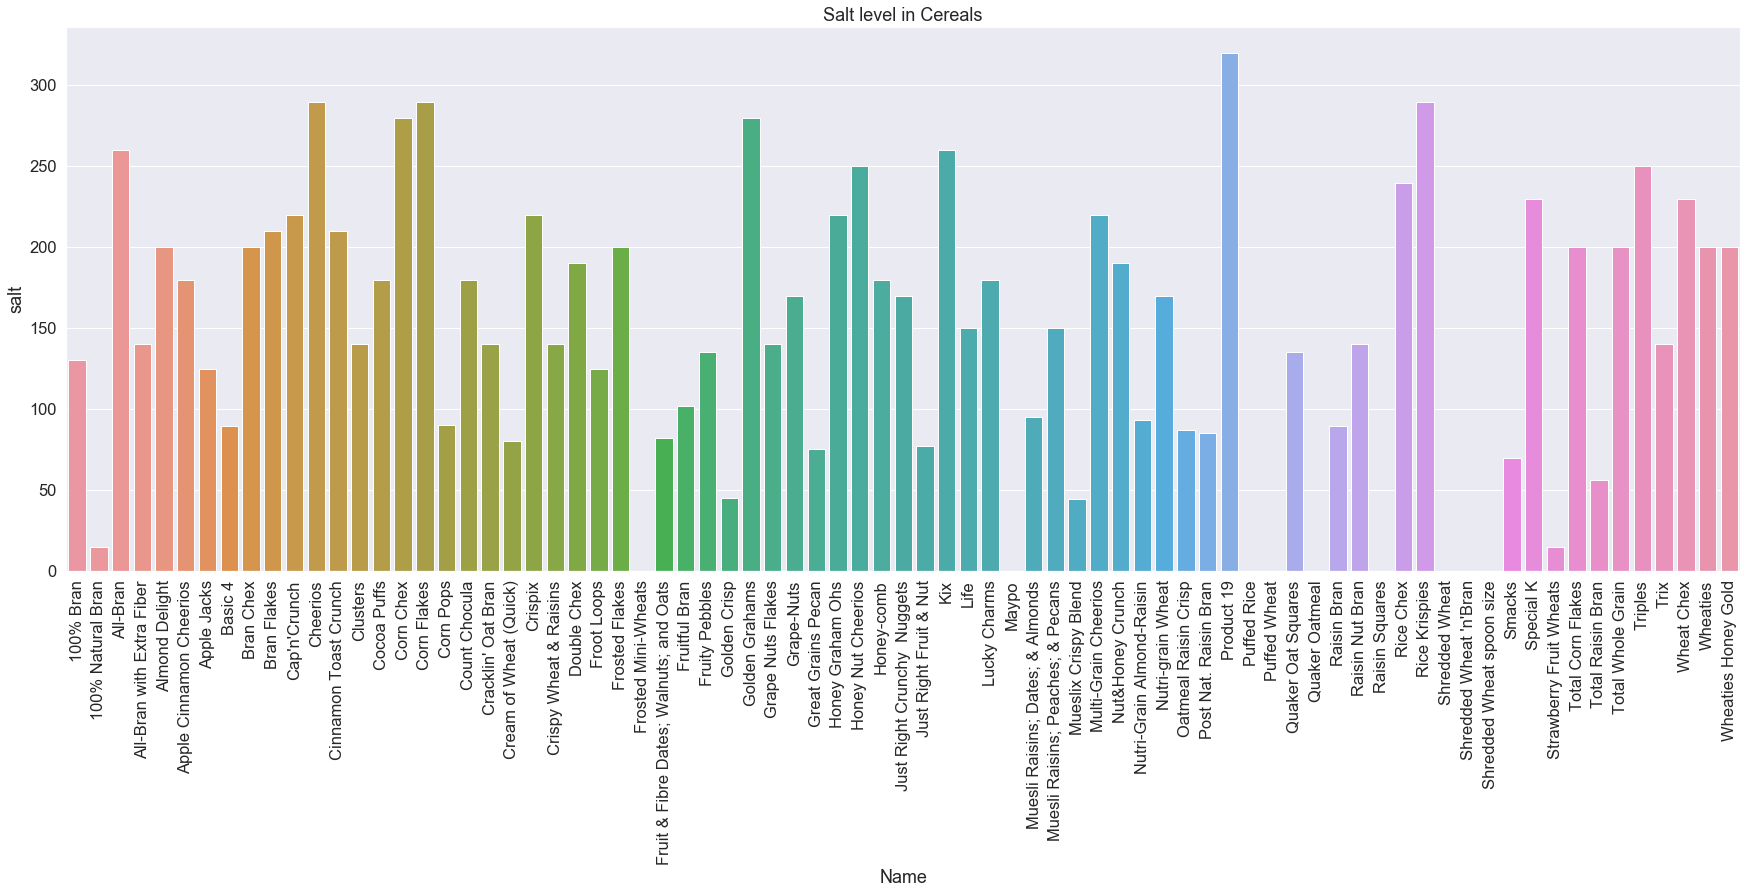

In [25]:
plt.figure(figsize = (30,10))
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)

plt.subplot()
ax = sns.barplot(x='name', y='sodium', data=cereal_df)
ax.set_xticklabels(cereal_df['name'], rotation=90, ha="center")
ax.set(xlabel='Name',ylabel='salt')
ax.set_title('Salt level in Cereals')

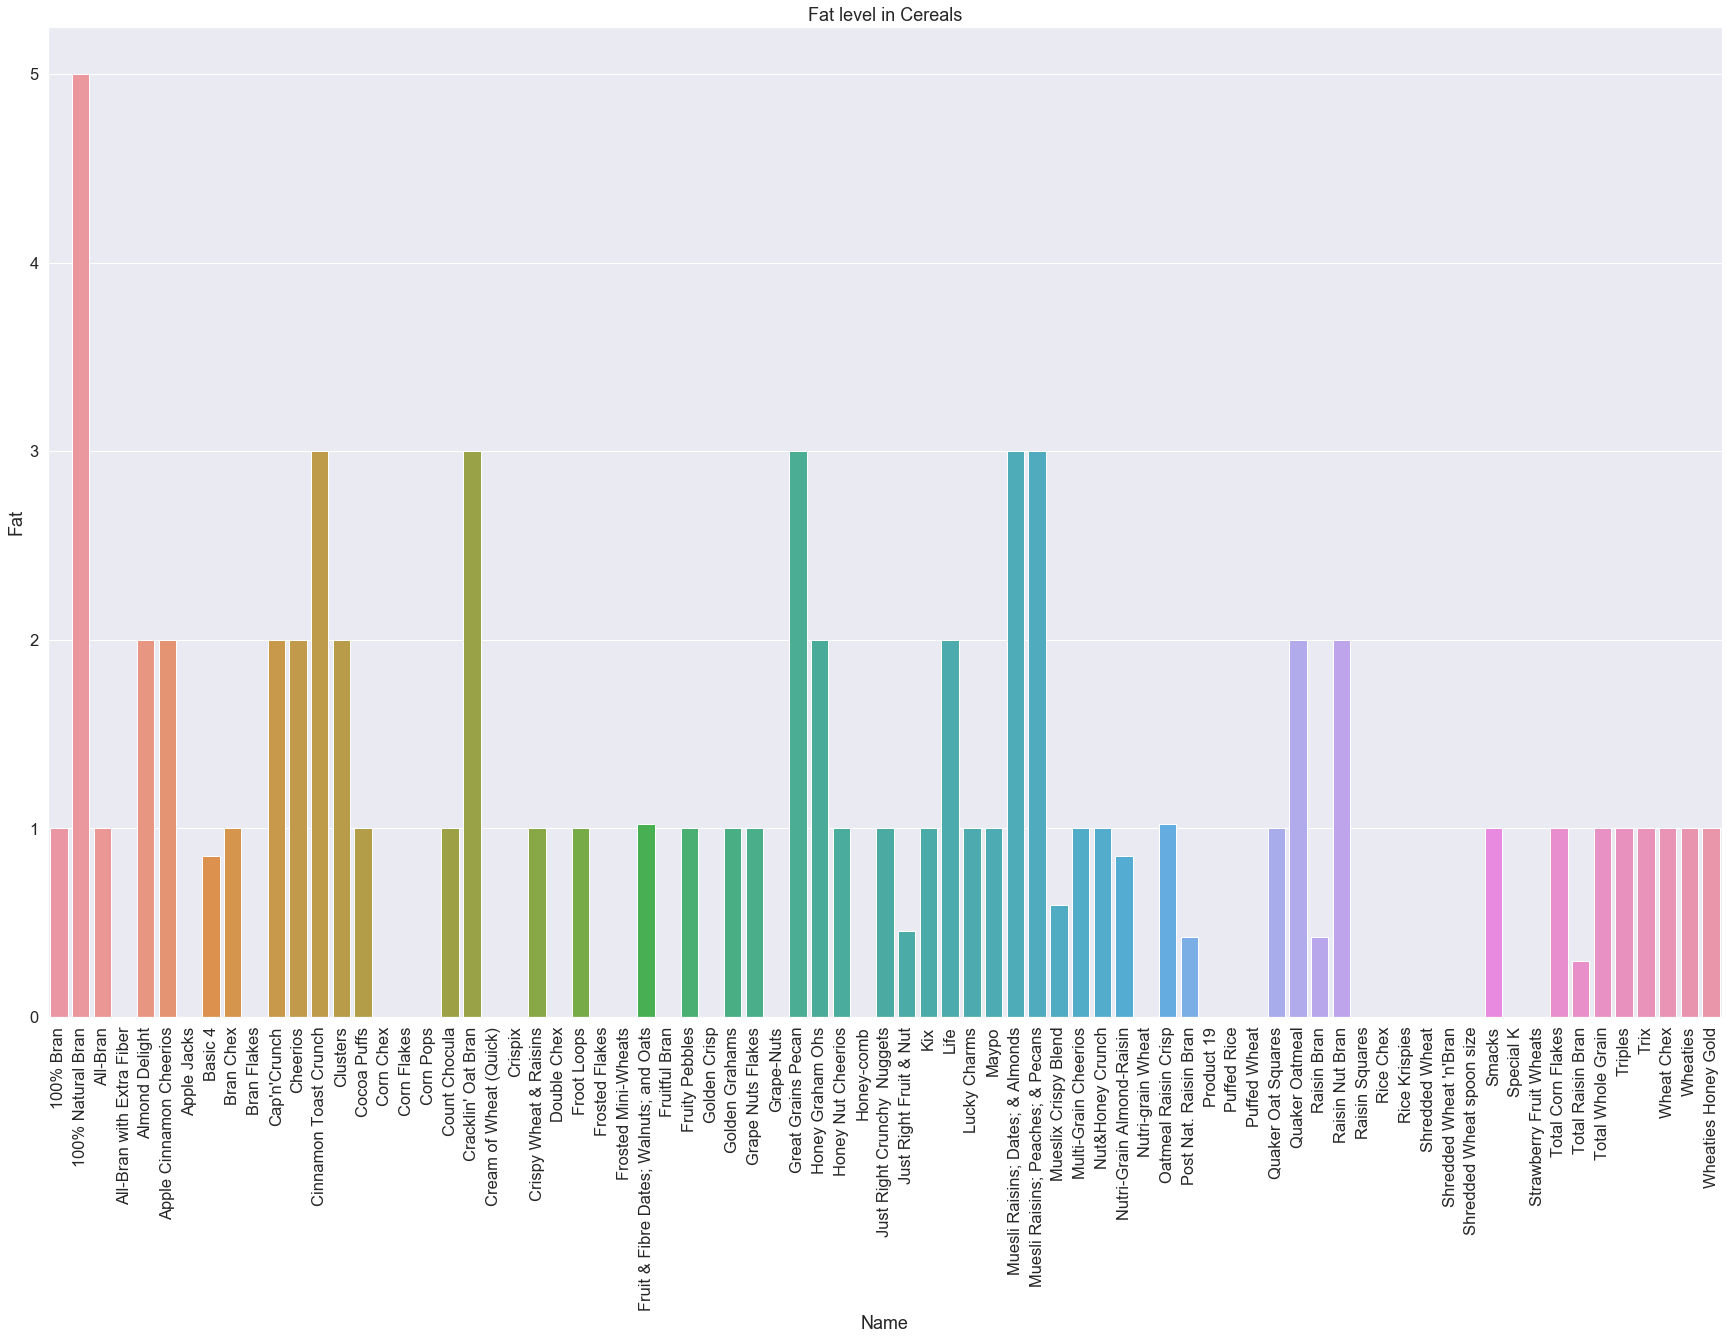

In [26]:
plt.figure(figsize = (30,10))
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)

plt.subplot()
ax = sns.barplot(x='name', y='fat', data=cereal_df)
ax.set_xticklabels(cereal_df['name'], rotation=90, ha="center")
ax.set(xlabel='Name',ylabel='Fat')
ax.set_title('Fat level in Cereals')

plt.subplots_adjust(hspace = 2.0, top = 1.5)

plt.show()


In [32]:
from plotly.plotly import iplot
from  plotly.offline import plot
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings

sugar = cereal_df.groupby('name')['sugars'].sum().to_frame().reset_index()
salt = cereal_df.groupby('name')['sodium'].sum().to_frame().reset_index()
fat = cereal_df.groupby('name')['fat'].sum().to_frame().reset_index()

#colors = None

trace0 = go.Scatter(x = sugar['name'], y = sugar['sugars'],
               mode = 'lines+markers',
               name = 'sugars')

trace1 = go.Scatter(x=fat['name'], y=fat['fat'],
               mode = 'lines+markers',
               name = 'fat')

#trace2 = go.Scatter(x=salt['name'], y=salt['sodium'],
              # mode = 'lines+markers',
              # name = 'sodium')


layout = dict(title= 'sugar and fat level in each cereal', 
                  font=dict(family='Courier New, monospace', size=9),
                  height=400, width=800)

fig = dict(data=[trace0, trace1], layout = layout)
py.iplot(fig)
#plotly.offline.iplot(fig)

In [35]:
print('Sugar level\n', cereal_df['sugars'].value_counts())

Sugar level
  3.000000     13
 6.000000      7
 0.000000      7
 11.000000     5
 5.000000      5
 12.000000     5
 8.000000      4
 10.000000     3
 9.000000      3
 7.000000      3
 13.000000     3
 2.000000      3
 15.000000     2
 5.100659      2
 5.120000      2
 5.950769      1
 4.000000      1
-1.000000      1
 1.000000      1
 4.148148      1
 14.000000     1
 4.096495      1
 3.400440      1
 3.851852      1
 2.975385      1
Name: sugars, dtype: int64


In [36]:
print('Fat level:\n',cereal_df['fat'].value_counts())

Fat level:
 0.000000    27
1.000000    26
2.000000     9
3.000000     5
1.024000     2
0.425055     2
0.850110     2
0.296296     1
0.455166     1
0.592593     1
5.000000     1
Name: fat, dtype: int64


In [37]:
print('Sodium or salt level:\n',cereal_df['sodium'].value_counts())

Sodium or salt level:
 0.000000      9
140.000000    7
200.000000    7
180.000000    5
220.000000    4
170.000000    3
290.000000    3
190.000000    2
250.000000    2
150.000000    2
280.000000    2
210.000000    2
230.000000    2
125.000000    2
89.261539     2
260.000000    2
15.000000     2
135.000000    2
90.000000     1
80.000000     1
44.444444     1
45.000000     1
81.920000     1
75.000000     1
95.000000     1
320.000000    1
240.000000    1
70.000000     1
93.512089     1
56.296296     1
85.010990     1
87.040000     1
102.013188    1
77.378243     1
130.000000    1
Name: sodium, dtype: int64


위 바와 산란 플롯에서, 어떤 브랜드가 낮은 설탕, 소금 그리고 지방을 가지고 있는지 식별하는 것은 약간 까다롭다.
좋은 조합을 찾기 위해 

출처: [NHS Report](https://www.nhs.uk/live-well/eat-well/healthy-breakfast-cereals/)

**설탕, 지방 또는 소금에 대한 낮은 수준 식별**

1. 저당: 100g당 5g 이하
2. 저지방: 100g당 포화 지방 3g 이하
3. 염분이 낮음: 100g당 0.3g 이하의 소금

In [39]:
#healthy_cereals = cereal_df.loc[(cereal_df['sugars'] <= 50) & (cereal_df['sodium'] <= 3) 
             #                  & (cereal_df['fat'] <= 30)]
    
cereal_df['healthy'] = np.where((cereal_df['sugars'] <= 5) & (cereal_df['sodium'] <= 0.3) 
                               & (cereal_df['fat'] <= 3)  
                               &(cereal_df['calories'] >= 50), 'yes','no')

cereal_df['healthy'].value_counts()

no     70
yes     7
Name: healthy, dtype: int64

In [40]:
healthy_cereals = cereal_df.loc[(cereal_df['healthy'] == 'yes') | (cereal_df['rating'] >= 60)]
healthy_cereals

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,healthy
0,100% Bran,N,C,70.00000,4.000000,1.0,130.0,10.000000,5.000000,6.0,280.000000,25.0,3,1.00,0.33,68.402973,no
3,All-Bran with Extra Fiber,K,C,50.00000,4.000000,0.0,140.0,14.000000,8.000000,0.0,330.000000,25.0,3,1.00,0.50,93.704912,no
20,Cream of Wheat (Quick),N,H,100.00000,3.000000,0.0,80.0,1.000000,21.000000,0.0,-1.000000,0.0,2,1.00,1.00,64.533816,no
43,Maypo,A,H,100.00000,4.000000,1.0,0.0,0.000000,16.000000,3.0,95.000000,25.0,2,1.00,1.00,54.850917,yes
54,Puffed Rice,Q,C,400.00000,8.000000,0.0,0.0,0.000000,104.000000,0.0,120.000000,0.0,3,0.50,1.00,60.756112,yes
55,Puffed Wheat,Q,C,400.00000,16.000000,0.0,0.0,8.000000,80.000000,0.0,400.000000,0.0,3,0.50,1.00,63.005645,yes
57,Quaker Oatmeal,Q,H,100.00000,5.000000,2.0,0.0,2.700000,-1.000000,-1.0,110.000000,0.0,1,1.00,0.67,50.828392,yes
63,Shredded Wheat,N,C,139.91224,3.497806,0.0,0.0,5.246709,27.982448,0.0,166.145785,0.0,1,0.83,1.00,68.235885,yes
64,Shredded Wheat 'n'Bran,N,C,90.00000,3.000000,0.0,0.0,4.000000,19.000000,0.0,140.000000,0.0,1,1.00,0.67,74.472949,yes
65,Shredded Wheat spoon size,N,C,90.00000,3.000000,0.0,0.0,3.000000,20.000000,0.0,120.000000,0.0,1,1.00,0.67,72.801787,yes


***아침에 얼마나 많은 칼로리를 섭취해야 합니까?***

[NHS 보고서 says](https://www.nhs.uk/live-well/eat-well/healthy-breakfast-cereals/)

건강한 체중을 유지하기 위한 유용한 엄지손가락 규칙은 400600-600의 접근방식을 따르는 것이다.

그 의미는 다음과 같습니다.

* 아침식사 시 400kcal(음료 및 반주 포함)
* 점심 식사의 경우 600kcal(음료 및 반주 포함)
* 저녁 식사 시 600kcal(음료 및 반주 포함)
그러면 하루 종일 몸에 좋은 음료와 간식을 즐길 수 있을 만큼만 남았을 뿐입니다. 이 조언은 여성의 일일 권장 칼로리 섭취량 2,000kcal에 기초한다.

"40g의 시리얼로부터 약 150kcal을 얻을 수 있습니다."라고 Goverindji는 말합니다. "중간 썰은 바나나와 200ml의 반건조 우유를 첨가할 수 있는데, 모두 합쳐 약 350kcal을 제공합니다. 

하지만 설탕, 지방, 소금이 많은 시리얼은 피하세요.

* 높은 설탕: 100g당 총 당 22.5g 이상
* 지방 함량: 100g당 17.5g 이상의 지방
* 염분이 높은 경우: 100g당 소금 1.5g 이상

In [43]:
trace0 = go.Scatter(
    x = healthy_cereals['name'],
    y = healthy_cereals['sugars'],
    mode = 'lines+markers',
    name = 'sugars'
)
trace1 = go.Scatter(
    x = healthy_cereals['name'],
    y = healthy_cereals['fat'],
    mode = 'lines+markers',
    name = 'fat'
)
trace2 = go.Scatter(
    x = healthy_cereals['name'],
    y = healthy_cereals['sodium'],
    mode = 'lines+markers',
    name = 'protine'
)
trace3 = go.Scatter(
    x = healthy_cereals['name'],
    y = healthy_cereals['fiber'],
    mode = 'lines+markers',
    name = 'fiber'
)
trace4 = go.Scatter(
    x = healthy_cereals['name'],
    y = healthy_cereals['rating'],
    mode = 'lines+markers',
    name = 'rating'
)

trace5 = go.Scatter(
    x = healthy_cereals['name'],
    y = healthy_cereals['carbo'],
    mode = 'lines+markers',
    name = 'carbo',
    xaxis='x2',
    yaxis='y2'
)
trace6 = go.Scatter(
    x = healthy_cereals['name'],
    y = healthy_cereals['potass'],
    mode = 'lines+markers',
    name = 'potass',
    xaxis='x2',
    yaxis='y2'
)
trace7 = go.Scatter(
    x = healthy_cereals['name'],
    y = healthy_cereals['calories'],
    mode = 'lines+markers',
    name = 'calories',
    xaxis='x2',
    yaxis='y2'
)
trace8 = go.Scatter(
    x = healthy_cereals['name'],
    y = healthy_cereals['rating'],
    mode = 'lines+markers',
    name = 'rating',
    xaxis='x2',
    yaxis='y2'
)

In [46]:
layout = go.Layout(
    xaxis=dict(domain=[0, 0.45] ),
    xaxis2=dict(domain=[0.55, 1]),
    yaxis2=dict(anchor='x2')
)

data = [trace0, trace1,trace2, trace3, trace4, trace5, trace6,trace7, trace8]
fig = go.Figure(data=data,layout=layout)
#py.iplot(data)
py.iplot(fig)

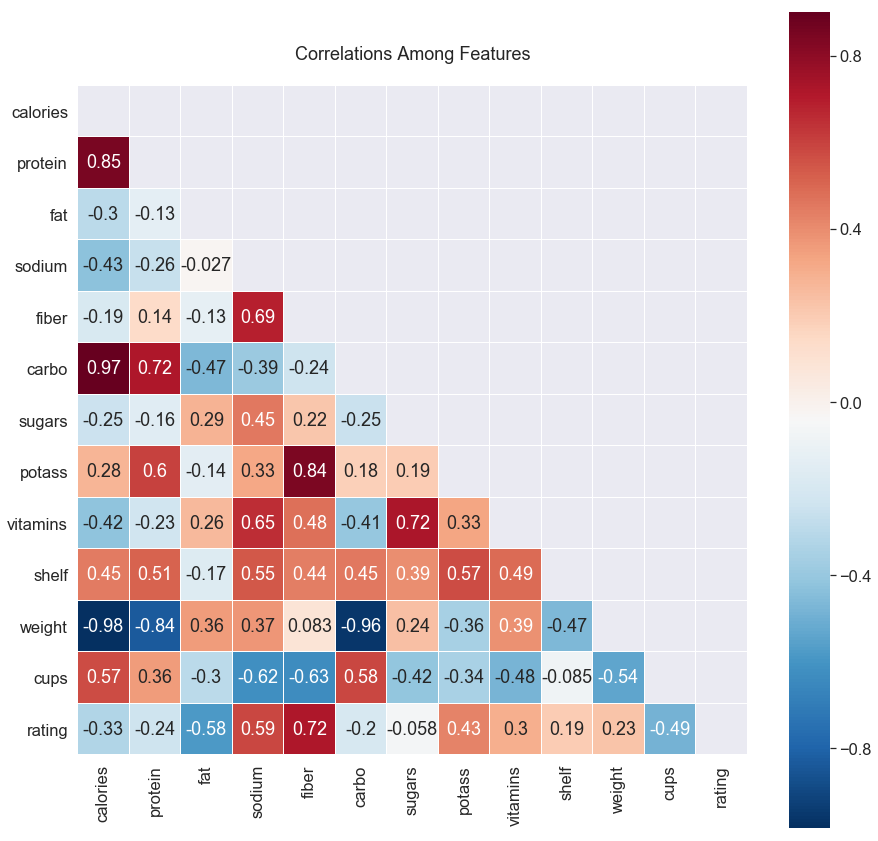

In [48]:
dropset = ['name', 'healthy']
nutrients = healthy_cereals.drop(dropset,axis=1)

# heatmeap to see the correlation between features 
mask = np.zeros_like(nutrients.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (15,15))
sns.heatmap(nutrients.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03)
plt.show()